<a href="https://colab.research.google.com/github/vkukkapalli1/HDS_5210_vsk/blob/main/week12/week12_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [85]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


condemnations = pd.read_csv('/content/condemn.txt', low_memory=False)
condemnations.shape

(32586, 40)

In [86]:
condemnations.head()

,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,...,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,...,1114.4006,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,...,1234.2003,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,...,1191.1004,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,...,1111.4000,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,...,1266.5001,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN


In [87]:
condemnations.columns

Index(['AcctNum', 'PrclErr', 'AddrAdjusted', 'CityBlock', 'Parcel',
       'OwnerCode', 'Handle', 'Parcel9', 'AddrNum', 'AddrSuf', 'StDir',
       'StName', 'StType', 'InspectDate', 'InspectType', 'CondLetterSent',
       'Status', 'OwnerCompany', 'OwnerName', 'OwnerAddr', 'OwnerCity',
       'OwnerState', 'OwnerZIP', 'GeoCityBLockPart', 'Ward00', 'Precinct02',
       'Nbrhd', 'CDADist', 'CDASubDist', 'PoliceDist', 'CensBlock00',
       'AsrNbrhd', 'ImpactCode', 'NLC', 'Parity', 'Inspector', 'Images',
       'FirstDate', 'LastDate', 'UpDateGeo'],
      dtype='object')

In [88]:
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'])
condemnations = condemnations.sort_values(by='InspectDate')

In [89]:
condemnations = condemnations[(condemnations['InspectDate'] >= '1986-01-01') &
                              (condemnations['InspectDate'] <= '2014-12-31')]

In [90]:
condemnations.head()

,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,...,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo
439,440.0,0.0,False,1865.00,90.0,0.0,1.186500e+10,186500090.0,3722,,...,1115.2025,232.0,2.0,79.0,E,NaN,NaN,1987-02-03 00:00:00,2019-01-04 00:00:00,NaN
287,288.0,0.0,False,1552.06,10.0,0.0,1.155206e+10,155206010.0,3678,,...,1246.1039,145.0,0.0,23.0,E,NaN,NaN,1987-06-30 00:00:00,2019-01-04 00:00:00,NaN
606,607.0,0.0,True,5124.00,410.0,0.0,1.512400e+10,512400410.0,5417,,...,1074.1002,327.0,2.0,319.0,O,NaN,NaN,1987-05-13 00:00:00,2019-01-04 00:00:00,NaN
839,794.0,0.0,True,5121.00,130.0,0.0,1.512100e+10,512100130.0,5242,,...,1074.1004,327.0,2.0,316.0,E,NaN,NaN,1989-03-14 00:00:00,2019-01-04 00:00:00,NaN
717,672.0,0.0,False,3803.04,170.0,0.0,1.380304e+10,380304170.0,1445,,...,1066.4003,239.0,2.0,122.0,O,NaN,NaN,1987-02-25 00:00:00,2019-01-04 00:00:00,NaN


In [91]:
condemnations.shape

(30232, 40)

In [92]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [93]:
condemnations['Year'] = condemnations['InspectDate'].dt.year
by_year = condemnations.pivot_table(index='Year',
                                    columns='Status',
                                    values='InspectDate',
                                    aggfunc=np.ma.count,
                                    fill_value=0)
by_year = by_year.sort_index()

In [94]:
by_year.head()

Status,B,L,R,W
Year,,,,
1986,22,12,19,112
1987,91,20,8,361
1988,215,16,15,297
1989,277,15,11,432
1990,119,29,8,322


In [95]:
by_year.columns

Index(['B', 'L', 'R', 'W'], dtype='object', name='Status')

In [96]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


<Axes: xlabel='Year'>

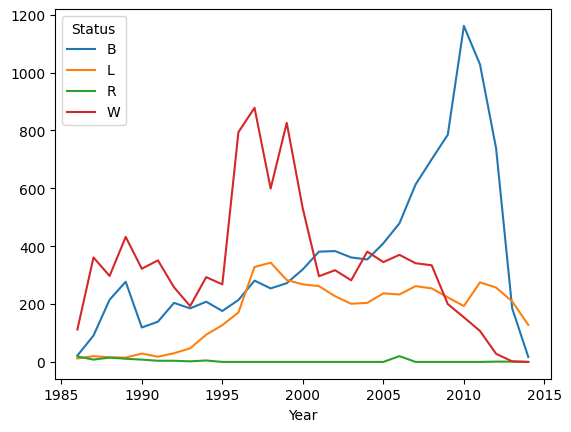

In [97]:
%matplotlib inline
by_year.plot()

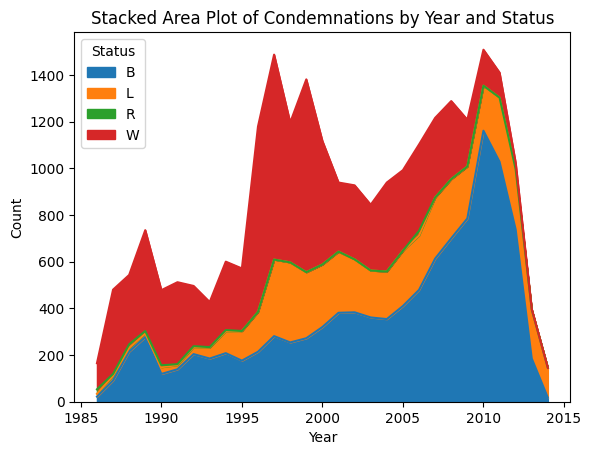

In [98]:
by_year.plot(kind="area", stacked=True,
             title="Stacked Area Plot of Condemnations by Year and Status",
             xlabel="Year", ylabel="Count")
plt.show()

---

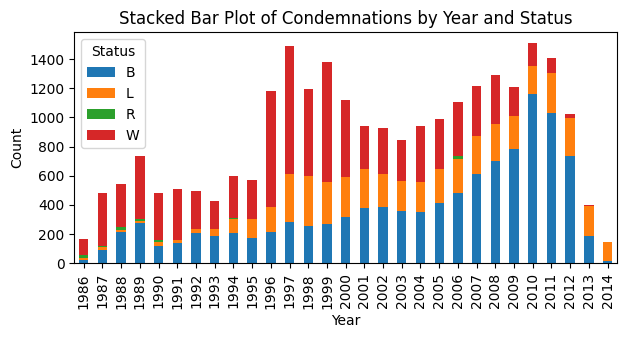

In [99]:
by_year.plot(kind="bar", stacked=True,
             figsize=(7, 3),
             title="Stacked Bar Plot of Condemnations by Year and Status",
             xlabel="Year", ylabel="Count")
plt.show()

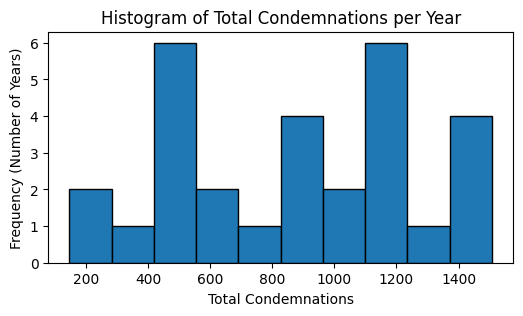

In [100]:
by_year['Total'] = by_year.sum(axis=1)
plt.figure(figsize=(6, 3))
plt.hist(by_year['Total'], bins=10, edgecolor='black')
plt.title("Histogram of Total Condemnations per Year")
plt.xlabel("Total Condemnations")
plt.ylabel("Frequency (Number of Years)")
plt.show()

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `/data/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [101]:
import pandas as pd
meetings = pd.read_csv('/content/meetings.csv')

In [102]:
meetings.head()  #to check how startTime is presented

,meeting_uuid,meetingTitle,meetingId,userName,user_id,user_tags,endTime,startTime,email,participantSeconds,...,meetingDurationMinutes,popId,userType,billable,moderatorLess,start_time,total_highlights_created,smart_meeting,transcription_used,total_transcription_duration_minutes
0,418897-3b9f0feb-f8f4-4ae7-9464-eb983c30af60,Review Payer Websites,681568231,chris.rogers.amitechsolutions,3180644,NaN,2020-03-31 22:21:35,2020-03-31 21:00:22,chris.rogers@amitechsolutions.com,19386,...,81.2167,26,ENTERPRISE_PAID,True,True,2020-03-31 21:00:22.0,NaN,NaN,NaN,NaN
1,418897-14587f14-faf0-4879-9756-fe335357b413,Drew's Meeting,258719784,Drew.Marco,2717893,NaN,2020-03-31 21:30:37,2020-03-31 20:58:41,Drew.Marco@AmitechSolutions.com,7242,...,31.9333,25,ENTERPRISE_PAID,True,True,2020-03-31 20:58:41.0,NaN,NaN,NaN,NaN
2,418897-aa82b3f0-e3df-456a-80d5-daef7902c232,St. Luke's Project Discussion,415828450,eric.keeney,2692908,NaN,2020-03-31 22:48:43,2020-03-31 20:57:51,eric.keeney@amitechsolutions.com,38469,...,110.8667,25,ENTERPRISE_PAID,True,True,2020-03-31 20:57:51.0,NaN,NaN,NaN,NaN
3,418867-f5fadea7-75f8-4860-9a1e-090805ff6346,Amit's Meeting,275007771,amit.bhagat,2756615,NaN,2020-03-31 21:02:28,2020-03-31 20:34:43,amit.bhagat@amitechsolutions.com,6394,...,27.7500,110,ENTERPRISE_PAID,True,True,2020-03-31 20:34:43.0,NaN,NaN,NaN,NaN
4,418894-3a911019-1a97-4058-8bd4-035245c73bda,Andrea's Meeting,791412043,andrea.bryant.amitechsolutions,2673353,NaN,2020-03-31 20:49:46,2020-03-31 20:30:02,hr-dept@amitechsolutions.com,3363,...,19.7333,25,ENTERPRISE_PAID,True,True,2020-03-31 20:30:02.0,NaN,NaN,NaN,NaN


In [103]:
meetings.shape

(1188, 25)

In [104]:
meetings['startDate'] = meetings['startTime'].str[0:10]

In [105]:
meetings.head() #to verify the creation of startDate.

,meeting_uuid,meetingTitle,meetingId,userName,user_id,user_tags,endTime,startTime,email,participantSeconds,...,popId,userType,billable,moderatorLess,start_time,total_highlights_created,smart_meeting,transcription_used,total_transcription_duration_minutes,startDate
0,418897-3b9f0feb-f8f4-4ae7-9464-eb983c30af60,Review Payer Websites,681568231,chris.rogers.amitechsolutions,3180644,NaN,2020-03-31 22:21:35,2020-03-31 21:00:22,chris.rogers@amitechsolutions.com,19386,...,26,ENTERPRISE_PAID,True,True,2020-03-31 21:00:22.0,NaN,NaN,NaN,NaN,2020-03-31
1,418897-14587f14-faf0-4879-9756-fe335357b413,Drew's Meeting,258719784,Drew.Marco,2717893,NaN,2020-03-31 21:30:37,2020-03-31 20:58:41,Drew.Marco@AmitechSolutions.com,7242,...,25,ENTERPRISE_PAID,True,True,2020-03-31 20:58:41.0,NaN,NaN,NaN,NaN,2020-03-31
2,418897-aa82b3f0-e3df-456a-80d5-daef7902c232,St. Luke's Project Discussion,415828450,eric.keeney,2692908,NaN,2020-03-31 22:48:43,2020-03-31 20:57:51,eric.keeney@amitechsolutions.com,38469,...,25,ENTERPRISE_PAID,True,True,2020-03-31 20:57:51.0,NaN,NaN,NaN,NaN,2020-03-31
3,418867-f5fadea7-75f8-4860-9a1e-090805ff6346,Amit's Meeting,275007771,amit.bhagat,2756615,NaN,2020-03-31 21:02:28,2020-03-31 20:34:43,amit.bhagat@amitechsolutions.com,6394,...,110,ENTERPRISE_PAID,True,True,2020-03-31 20:34:43.0,NaN,NaN,NaN,NaN,2020-03-31
4,418894-3a911019-1a97-4058-8bd4-035245c73bda,Andrea's Meeting,791412043,andrea.bryant.amitechsolutions,2673353,NaN,2020-03-31 20:49:46,2020-03-31 20:30:02,hr-dept@amitechsolutions.com,3363,...,25,ENTERPRISE_PAID,True,True,2020-03-31 20:30:02.0,NaN,NaN,NaN,NaN,2020-03-31


In [106]:
meetings['Period'] = None
meetings.loc[(meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] <= '2020-02-28'), 'Period'] = 'Before'
meetings.loc[(meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] <= '2020-03-27'), 'Period'] = 'During'
meetings = meetings.dropna(subset=['Period'])

In [107]:
meetings.head()

,meeting_uuid,meetingTitle,meetingId,userName,user_id,user_tags,endTime,startTime,email,participantSeconds,...,userType,billable,moderatorLess,start_time,total_highlights_created,smart_meeting,transcription_used,total_transcription_duration_minutes,startDate,Period
59,418327-3e2a5afc-1b17-4c51-933d-552855a3e8b2,Angie's Meeting,409230643,angie.warren,3313169,NaN,2020-03-27 22:21:52,2020-03-27 22:00:23,angie.warren@amitechsolutions.com,2513,...,ENTERPRISE_PAID,True,True,2020-03-27 22:00:23.0,NaN,NaN,NaN,NaN,2020-03-27,During
60,418321-bb98a085-244c-4522-b261-029b03408278,Drew's Meeting,258719784,Drew.Marco,2717893,NaN,2020-03-27 21:20:28,2020-03-27 20:58:29,Drew.Marco@AmitechSolutions.com,4816,...,ENTERPRISE_PAID,True,True,2020-03-27 20:58:29.0,NaN,NaN,NaN,NaN,2020-03-27,During
61,418318-1267d351-6ffd-4f72-a23e-b2eb98c8363c,Paul's Meeting,747887819,paul.boal,2385853,NaN,2020-03-27 20:51:13,2020-03-27 20:29:51,paul.boal@amitechsolutions.com,2122,...,ENTERPRISE_PAID,True,True,2020-03-27 20:29:51.0,NaN,NaN,NaN,NaN,2020-03-27,During
62,418315-ccd6d6da-86de-40c6-ac18-be9859e01a0e,Project Impacts/Issues Review,718434768,shawn.reilly.amitechsolutions,3295617,NaN,2020-03-27 21:21:35,2020-03-27 19:56:12,shawn.reilly@amitechsolutions.com,17513,...,ENTERPRISE_PAID,True,False,2020-03-27 19:56:12.0,NaN,NaN,NaN,NaN,2020-03-27,During
63,418314-85ea8bec-311c-456c-af22-8f0ca61267ba,Waylit/Amitech Intro call,677187713,amit.bhagat,2756615,NaN,2020-03-27 20:43:52,2020-03-27 19:53:30,amit.bhagat@amitechsolutions.com,8147,...,ENTERPRISE_PAID,True,True,2020-03-27 19:53:30.0,NaN,NaN,NaN,NaN,2020-03-27,During


In [108]:
meetings.shape
# 2 new columns are STARTDATE and PERIOD. Also the rows where 'period' were 0/Null are dropped.

(457, 27)

In [109]:
summary = meetings.pivot_table(index='userName', columns='Period', values='meeting_uuid', aggfunc='count', fill_value=0)

In [110]:
summary.head()

Period,Before,During
userName,,
Drew.Marco,12,19
amit.bhagat,17,30
andrea.bryant.amitechsolutions,5,3
angie.warren,5,9
chris.rogers.amitechsolutions,4,3


In [111]:
summary['pctChange'] = ((summary['During'] - summary['Before']) / summary['Before']).replace([float('inf'), -float('inf')], 0).fillna(0)

In [112]:
summary.head()

Period,Before,During,pctChange
userName,,,
Drew.Marco,12,19,0.583333
amit.bhagat,17,30,0.764706
andrea.bryant.amitechsolutions,5,3,-0.400000
angie.warren,5,9,0.800000
chris.rogers.amitechsolutions,4,3,-0.250000


In [113]:
summary.shape

(22, 3)

---

In [114]:
assert(len(summary) == 22)

In [115]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

Submit as usual
